In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os 

os.chdir("/content/drive/My Drive")

In [3]:
cd dataset/

/content/drive/.shortcut-targets-by-id/1cv15aT7p4272_F6E4pwl-gjKZJ0aNaod/dataset


In [4]:
ls -ltr

total 8
dr-x------ 2 root root 4096 Jul 25 16:32 train_validate/
dr-x------ 2 root root 4096 Jul 25 16:32 test/


In [5]:
cd train_validate/

/content/drive/.shortcut-targets-by-id/1cv15aT7p4272_F6E4pwl-gjKZJ0aNaod/dataset/train_validate


In [6]:
ls -ltr

total 8
dr-x------ 2 root root 4096 Jul 25 16:32 unmasked/
dr-x------ 2 root root 4096 Jul 25 16:32 masked/


In [7]:
pwd

'/content/drive/.shortcut-targets-by-id/1cv15aT7p4272_F6E4pwl-gjKZJ0aNaod/dataset/train_validate'

In [8]:
cd /content/drive/My Drive/ML-CNN

/content/drive/My Drive/ML-CNN


In [10]:
cd /content/drive/My Drive/

/content/drive/My Drive


In [11]:
cd ..

/content/drive


In [12]:
pwd

'/content/drive'

In [17]:
 !pip install split-folders tqdm

In [18]:
import splitfolders

In [20]:
splitfolders.ratio("/content/drive/My Drive/ML-CNN/dataset/train_validate/", output="/content/drive/My Drive/ML-CNN/dataset/output", seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 1727 files [00:18, 91.29 files/s]


In [69]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale= 1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/My Drive/ML-CNN/dataset/output/train', target_size=(64, 64), color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True, seed=42)

Found 1381 images belonging to 2 classes.


In [70]:
test_datagen = ImageDataGenerator(rescale= 1./255)
test_generator = test_datagen.flow_from_directory('/content/drive/My Drive/ML-CNN/dataset/test', target_size=(64, 64), color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True, seed=42)

Found 320 images belonging to 2 classes.


In [71]:
from keras.preprocessing.image import ImageDataGenerator
validate_datagen = ImageDataGenerator(rescale= 1./255)
validate_generator = train_datagen.flow_from_directory('/content/drive/My Drive/ML-CNN/dataset/output/val', target_size=(64, 64), color_mode='rgb', batch_size=32, class_mode='categorical', shuffle=True, seed=42)

Found 346 images belonging to 2 classes.


In [88]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

In [119]:
# Create a Sequential model object
cnnModel = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModel.add(layers.Conv2D(16, 3, activation="relu", input_shape=(64,64,3) ))

cnnModel.add(layers.MaxPooling2D((2,2)))

cnnModel.add(layers.Flatten())

# Layer 6
cnnModel.add(layers.Dense(128, activation="softmax" ))

cnnModel.add(layers.Dense(2))

cnnModel.summary()


Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 15376)             0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               1968256   
_________________________________________________________________
dense_29 (Dense)             (None, 2)                 258       
Total params: 1,968,962
Trainable params: 1,968,962
Non-trainable params: 0
_________________________________________________________________


In [120]:
cnnModel.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [121]:
history = cnnModel.fit(train_generator, epochs=70, validation_data=validate_generator)


Epoch 1/70
44/44 [==============================] - 8s 173ms/step - loss: 0.9211 - accuracy: 0.4985 - val_loss: 0.4660 - val_accuracy: 0.1040
Epoch 2/70
44/44 [==============================] - 7s 161ms/step - loss: 0.4935 - accuracy: 0.1120 - val_loss: 0.2907 - val_accuracy: 0.0723
Epoch 3/70
44/44 [==============================] - 7s 169ms/step - loss: 0.7180 - accuracy: 0.3283 - val_loss: 0.7021 - val_accuracy: 0.4855
Epoch 4/70
44/44 [==============================] - 8s 175ms/step - loss: 0.6362 - accuracy: 0.4813 - val_loss: 0.4688 - val_accuracy: 0.0751
Epoch 5/70
44/44 [==============================] - 7s 163ms/step - loss: 0.3732 - accuracy: 0.0707 - val_loss: 0.2308 - val_accuracy: 0.0520
Epoch 6/70
44/44 [==============================] - 7s 162ms/step - loss: 0.1708 - accuracy: 0.0439 - val_loss: 0.2054 - val_accuracy: 0.0462
Epoch 7/70
44/44 [==============================] - 7s 162ms/step - loss: 0.1238 - accuracy: 0.0406 - val_loss: 0.2354 - val_accuracy: 0.0434
Epoch 

[0.41346850991249084, 0.1209268644452095, 0.43953657150268555, 0.4576393961906433, 0.06082548946142197, 0.04923968017101288, 0.04127443954348564, 0.02389572747051716, 0.018102824687957764, 0.019551049917936325, 0.013758146204054356, 0.007965242490172386, 0.0065170167945325375, 0.010137581266462803, 0.0050687906332314014, 0.0043446775525808334, 0.0050687906332314014, 0.003620564704760909, 0.003620564704760909, 0.003620564704760909, 0.0043446775525808334, 0.003620564704760909, 0.003620564704760909, 0.003620564704760909, 0.007241129409521818, 0.3287472724914551, 0.49601736664772034, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.5025343894958496, 0.48660391569137573, 0.5112237334251404, 0.48660391569137573, 0.48660391569137573, 0.5184648633003235, 0.48660391569137573, 0.48660391569137573, 0.5097755193710327, 0.4866039156913757

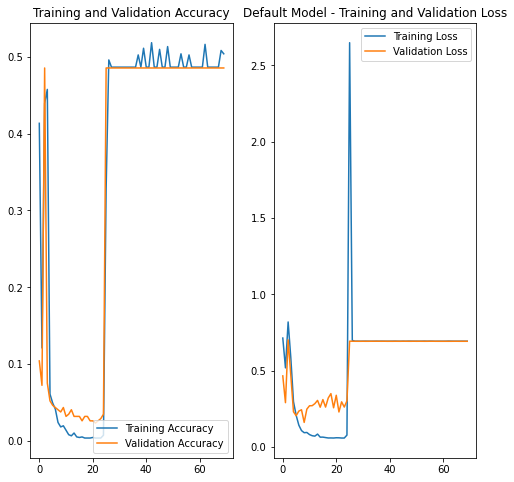

In [122]:
epochs = 70
# Plotting Accuracy and loss for teh default model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Default Model - Training and Validation Loss')
plt.show()

In [123]:
class_names = ['masked', 'unmasked']
print (class_names)

['masked', 'unmasked']


In [124]:
# 4. Evaluate the trained CNN model on test data. Print classification results. [2 point]
df = pd.DataFrame(columns=['Actual', 'Predicted'])
images = []
rows_list = []
def predictimages(folder_path, mask_type, df):
  className = 'masked'
  if mask_type == False:
    className = 'unmasked'
  folder_path += '/' + className
  for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = keras.preprocessing.image.load_img(img, target_size=(64, 64))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = cnnModel.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    rows_list.append({'Actual': mask_type, 'Predicted' : mask_type if (class_names[np.argmax(score)] == className) else (not mask_type)})

folder_path = '/content/drive/My Drive/ML-CNN/dataset/test'
mask_type = True
predictimages(folder_path, mask_type, df)
mask_type = False
predictimages(folder_path, mask_type, df)
df = pd.DataFrame(rows_list)

print('---------------------------Accuracy Score----------------')
print(accuracy_score(df['Actual'].tolist(),df['Predicted'].tolist()))
print('---------------------------Confusion Matrix----------------')
print(confusion_matrix(df['Actual'].tolist(),df['Predicted'].tolist()).ravel())
print('---------------------------Precision Recall Fscore Support----------------')
default_precision, default_recall, default_fscore, default_support = precision_recall_fscore_support(df['Actual'].tolist(),df['Predicted'].tolist(), average='macro')
print(default_precision, default_recall, default_fscore, default_support)
print('---------------------------Classification Report----------------')
print(classification_report(df['Actual'].tolist(),df['Predicted'].tolist()))

---------------------------Accuracy Score----------------
0.5
---------------------------Confusion Matrix----------------
[160   0 160   0]
---------------------------Precision Recall Fscore Support----------------
0.25 0.5 0.3333333333333333 None
---------------------------Classification Report----------------
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       160
        True       0.00      0.00      0.00       160

    accuracy                           0.50       320
   macro avg       0.25      0.50      0.33       320
weighted avg       0.25      0.50      0.33       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
# Create a Sequential model object
cnnModel_1 = models.Sequential()

# Add layers Conv2D for CNN and sepcify MaxPooling

# Layer 1 = input layer
cnnModel_1.add(layers.Conv2D(16, 3, activation="relu", input_shape=(64,64,3) ))

cnnModel_1.add(layers.MaxPooling2D((2,2)))

# Layer 2 = input layer
cnnModel_1.add(layers.Conv2D(32, 3, activation="relu", input_shape=(64,64,3) ))

cnnModel_1.add(layers.MaxPooling2D((2,2)))

# Layer 3 = input layer
cnnModel_1.add(layers.Conv2D(64, 3, activation="relu", input_shape=(64,64,3) ))

cnnModel_1.add(layers.MaxPooling2D((2,2)))

cnnModel_1.add(layers.Flatten())

# Layer 4
cnnModel_1.add(layers.Dense(128, activation="softmax" ))

cnnModel_1.add(layers.Dense(2))

cnnModel_1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 31, 31, 16)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 29, 29, 32)        4640      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2304)            

In [147]:
cnnModel_1.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [153]:
history_1 = cnnModel_1.fit(train_generator, epochs=35, validation_data=validate_generator)

Epoch 1/35
44/44 [==============================] - 9s 194ms/step - loss: 0.6930 - accuracy: 0.4866 - val_loss: 0.6927 - val_accuracy: 0.4855
Epoch 2/35
44/44 [==============================] - 8s 188ms/step - loss: 0.6930 - accuracy: 0.4866 - val_loss: 0.6927 - val_accuracy: 0.4855
Epoch 3/35
44/44 [==============================] - 8s 189ms/step - loss: 0.6932 - accuracy: 0.4866 - val_loss: 0.6927 - val_accuracy: 0.4855
Epoch 4/35
44/44 [==============================] - 9s 192ms/step - loss: 0.6929 - accuracy: 0.4866 - val_loss: 0.6927 - val_accuracy: 0.4855
Epoch 5/35
44/44 [==============================] - 9s 201ms/step - loss: 0.6934 - accuracy: 0.4866 - val_loss: 0.6929 - val_accuracy: 0.4855
Epoch 6/35
44/44 [==============================] - 9s 192ms/step - loss: 0.6930 - accuracy: 0.4866 - val_loss: 0.6927 - val_accuracy: 0.4855
Epoch 7/35
44/44 [==============================] - 9s 192ms/step - loss: 0.6930 - accuracy: 0.4866 - val_loss: 0.6928 - val_accuracy: 0.4855
Epoch 

[0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.5242577791213989, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.5054308176040649, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.48660391569137573, 0.5097755193710327, 0.48660391569137573, 0.48660391569137573]
[0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.48554912209510803, 0.485549122095

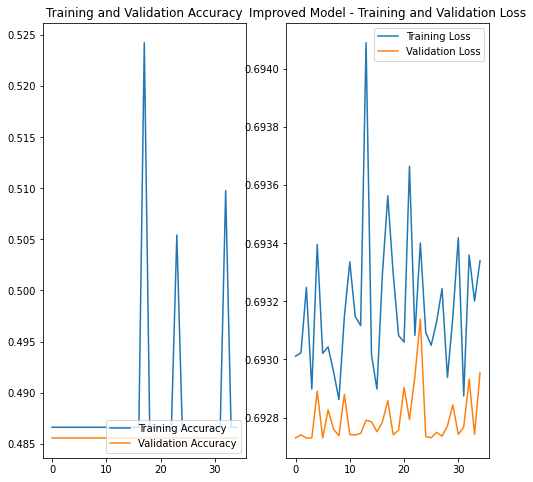

In [155]:
epochs = 35
# Plotting Accuracy and loss for teh default model
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

print(acc)
print(val_acc)
print(loss)
print(val_loss)

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Improved Model - Training and Validation Loss')
plt.show()

In [156]:
df = pd.DataFrame(columns=['Actual', 'Predicted'])
images = []
rows_list = []
def predictimages(folder_path, mask_type, df):
  className = 'masked'
  if mask_type == False:
    className = 'unmasked'
  folder_path += '/' + className
  for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = keras.preprocessing.image.load_img(img, target_size=(64, 64))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)
    predictions = cnnModel_1.predict(img_array)
    score = tf.nn.softmax(predictions[0])
    rows_list.append({'Actual': mask_type, 'Predicted' : mask_type if (class_names[np.argmax(score)] == className) else (not mask_type)})

folder_path = '/content/drive/My Drive/ML-CNN/dataset/test'
mask_type = True
predictimages(folder_path, mask_type, df)
mask_type = False
predictimages(folder_path, mask_type, df)
df = pd.DataFrame(rows_list)

print('---------------------------Accuracy Score----------------')
print(accuracy_score(df['Actual'].tolist(),df['Predicted'].tolist()))
print('---------------------------Confusion Matrix----------------')
print(confusion_matrix(df['Actual'].tolist(),df['Predicted'].tolist()).ravel())
print('---------------------------Precision Recall Fscore Support----------------')
improved_precision, improved_recall, improved_fscore, improved_support = precision_recall_fscore_support(df['Actual'].tolist(),df['Predicted'].tolist(), average='macro')
print(improved_precision, improved_recall, improved_fscore, improved_support)
print('---------------------------Classification Report----------------')
print(classification_report(df['Actual'].tolist(),df['Predicted'].tolist()))

---------------------------Accuracy Score----------------
0.5
---------------------------Confusion Matrix----------------
[160   0 160   0]
---------------------------Precision Recall Fscore Support----------------
0.25 0.5 0.3333333333333333 None
---------------------------Classification Report----------------
              precision    recall  f1-score   support

       False       0.50      1.00      0.67       160
        True       0.00      0.00      0.00       160

    accuracy                           0.50       320
   macro avg       0.25      0.50      0.33       320
weighted avg       0.25      0.50      0.33       320



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


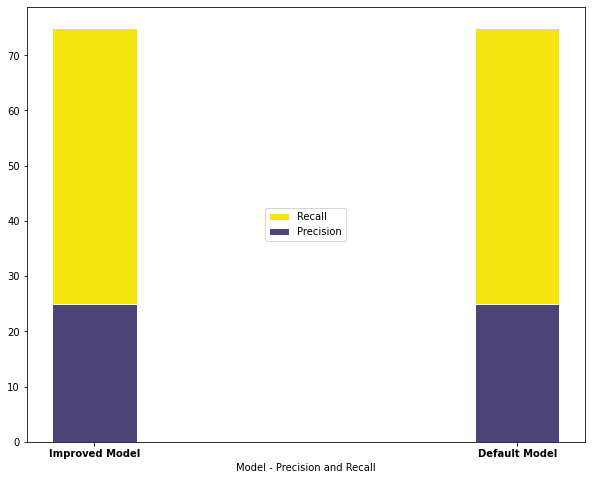

In [157]:
# Plot precision and recall for default and improved model in a single bar plot
fig, ax = plt.subplots(figsize=(10,8))
bars1 = np.array([improved_precision, default_precision])*100
bars2 = np.array([improved_recall, default_recall])*100
bars = np.add(bars1, bars2).tolist()
r = [0,1]
names = ['Improved Model','Default Model']
barWidth = 0.2
plt.bar(r, bars2, bottom=bars1, color='#f4e511', edgecolor='white', width=barWidth, label="Recall")
plt.bar(r, bars1, color='#4c4376', edgecolor='white', width=barWidth, label="Precision")
plt.xticks(r, names, fontweight='bold')
plt.xlabel("Model - Precision and Recall")
plt.legend(loc="center")
plt.show()